<h1> Integrated Project </h1>

<h3> Integrated Project </h3>


<h2>Contents</h2>

[<font size="+1">Step 1 Open the data file and study the general information</font>](#Step_1)

[Step 1.1 Head of table](#Step_1.1)

[Step 1.2 Null Values](#Step_1.2)

[Step 1.3 Null values for user, critic and rating](#Step_1.3)

[Step 1.4 Duplicated values](#Step_1.4)

[Step 1.5 Conclusion](#Step_1.5)
    
[<font size="+1">Step 2 Prepare the data</font>](#Step_2) 

[Step 2.1 Column names to lowercase](#Step_2.1)    

[Step 2.2 Missing values](#Step_2.2)   

[Step 2.3 Convert data type](#Step_2.3)  

[Step 2.4 Calculate total sales](#Step_2.4)  

[Step 2.5 Conclusion](#Step_2.5) 


[<font size="+1">Step 3. Analyze the data</font>](#Step_3) 

[Step 3.1 Number of released games per year](#Step_3.1)

[Step 3.2 Sales per platform](#Step_3.2)

[Step 3.2.1 Greatest total sales](#Step_3.2.1)

[Step 3.2.2 Distribution based on data for each year](#Step_3.2.2)

[Step 3.3 Determine period for prognosis](#Step_3.3)

[Step 3.4 Leading platforms](#Step_3.4)

[Step 3.4.1 Leading platforms by year](#Step_3.4.1)

[Step 3.4.2 Boxplot for leadind platforms](#Step_3.4.2)

[Step 3.5 Effect of professional reviews on sales](#Step_3.5)

[Step 3.6 Sales of the same games on other platforms](#Step_3.6)

[Step 3.7 Distribution of games by genre](#Step_3.7)

[Step 3.8 Conclusion](#Step_3.8)

[<font size="+1">Step 4. User profile for each region</font>](#Step_4) 

[Step 4.1 Top five platforms](#Step_4.1)

[Step 4.2 Top five genres](#Step_4.2)

[Step 4.3 Conclusion](#Step_4.3)


[<font size="+1">Step 5. Test hypotheses</font>](#Step_5) 

[Step 5.1 User's ratings of the Xbox One and PC](#Step_5.1)

[Step 5.2 User's ratings for the Action and Sport genres](#Step_5.2)

[<font size="+1">Step 6. General conclusion</font>](#Step_6) 

<a id='Step_1'></a>

<h3>Step 1. Open the data file and study the general information</h3>

<a id='Step_1.1'></a>

<h3>1.1 Head of table </h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

try:
    games = pd.read_csv(r'C:\Users\andreyc\Desktop\projects\gamePlatforms\games.csv')
except:
    print('issue during reading csv file')






In [2]:
print(games.head(10))

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77     

<h3>1.2 General information </h3>

In [3]:
print(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


<a id='Step_1.2'></a>

<h3> 1.2 Null Values </h3>

In [3]:
print('{:>30}'.format('Null Values per column'))
print('')

for column in games.columns:
    print(column,':')
    print(pd.isnull(games[column]).sum())
    print('')

        Null Values per column

Name :
2

Platform :
0

Year_of_Release :
269

Genre :
2

NA_sales :
0

EU_sales :
0

JP_sales :
0

Other_sales :
0

Critic_Score :
8578

User_Score :
6701

Rating :
6766



<a id='Step_1.3'></a>

<h3>1.3 Null values for user, critic and rating</h3>

In [5]:
print('Null values for user, critic and rating: ')

games[(pd.isnull(games['Rating'])) & (pd.isnull(games['User_Score'])) & (pd.isnull(games['Critic_Score']))]['Name'].count()
                                      
                                      
                                      
                                      
                                      
                                      

Null values for user, critic and rating: 


6619

<a id='Step_1.4'></a>

<h3>1.4 Duplicated values </h3>

In [6]:
games.duplicated().sum()

0

<a id='Step_1.5'></a>

<h3>1.5 Conclusion

After first look, I noticed Null values in several columns and no duplicated rows.

Also we can see some of columns have wrong type (such as year_of_release and critic_score)

<a id='Step_2'></a>

<h3>Step 2. Prepare the data</h3>

<a id='Step_2.1'></a>

<h3>2.1 Column names to lowercase</h3>

In [4]:
games.columns = games.columns.str.lower()



<a id='Step_2.2'></a>

<h3>2.2 Missing values</h3>

In [6]:
games.dropna(subset=['name', 'genre', 'year_of_release' ], inplace=True) 

for i in games:
    games[i].fillna(0, inplace=True)

#games['critic_score'].fillna(0, inplace=True)
#games['user_score'].fillna(0, inplace=True)
#games['rating'].fillna(0, inplace=True)




<a id='Step_2.3'></a>

<h3>2.3 Convert data type</h3>

In [7]:
games['year_of_release'] = games['year_of_release'].astype('int')
games['critic_score'] = games['critic_score'].astype('float')



games.info()
#print(games[games['user_score']=='tbd'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


<a id='Step_2.4'></a>

<h3>2.4 Calculate total sales</h3>

In [8]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  \
0     28.96      3.77         8.45          76.0          8      E   
1      3.58      6.81         0.77           0.0          0      0   
2     12.76      3.79         3.29          82.0        8.3      E   
3     10.93      3.28         2.95          80.0          8      E   
4      8.89     10.22         1.00           0.0          0      0   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4      

<a id='Step_2.5'></a>

<h3>2.5 Conclusion 

During step 2 I have done following:
    
- Converted column names to lowercase.

- Decided to replace missing values in columns critic_score, rating and user_score. The reason I did it is that I do not see any way to predict score or rating based on information that I already have.
In addition, I think that conlusion will be more accurate if I will use only existing data and not replaced.

- Converted data types critic_score and year_of_release to numeric.

- Added additional column which is total sales based on na_sales, eu_sales, jp_sales and other_sales.

<a id='Step_3'></a>

<h3>Step 3. Analyze the data</h3>

<a id='Step_3.1'></a>

<h3>3.1 Number of released games per year</h3>

1980-1990:  221
1990-2000:  2103
2000-2010:  10098
2010-2016:  4022


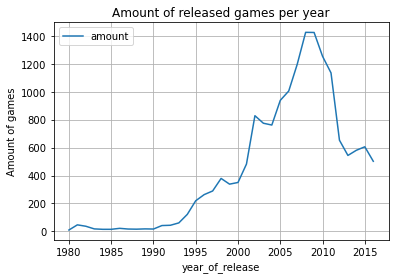

In [9]:


    
print('1980-1990:',games.pivot_table(index='year_of_release', values='name', aggfunc=('count')).query('index <= 1990').sum().to_string(index=False))
print('1990-2000:',games.pivot_table(index='year_of_release', values='name', aggfunc=('count')).query('index <= 2000 and index > 1990').sum().to_string(index=False))
print('2000-2010:',games.pivot_table(index='year_of_release', values='name', aggfunc=('count')).query('index <= 2010 and index > 2000').sum().to_string(index=False))
print('2010-2016:',games.pivot_table(index='year_of_release', values='name', aggfunc=('count')).query('index > 2010').sum().to_string(index=False))

    


games_per_year = (games.pivot_table(index='year_of_release', values='name', aggfunc=('count'))
                   .rename(columns={'name':'amount'}, index={'year_of_release':'year'})
                   .plot(grid=True, title='Amount of released games per year') 
                   .set_ylabel("Amount of games")
                   
                 )



<a id='Step_3.2'></a>

<h3>3.2 Sales per platform</h3>

<a id='Step_3.2.1'></a>

<h3>3.2.1 Greatest total sales</h3>

Text(0, 0.5, 'Sales')


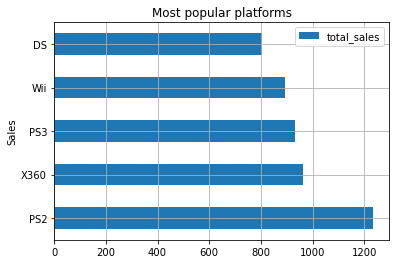

In [34]:
platform_pivot = games.pivot_table(index='platform', values='total_sales', aggfunc=('sum'))

print(platform_pivot.sort_values(by='total_sales',ascending=False).head(5).plot(kind = 'barh',grid=True, title='Most popular platforms').set_ylabel("Sales"))


<a id='Step_3.2.2'></a>

<h3>3.2.2 Distribution based on data for each year</h3>

<AxesSubplot:title={'center':'Total sales per year for each platform'}, xlabel='year_of_release'>

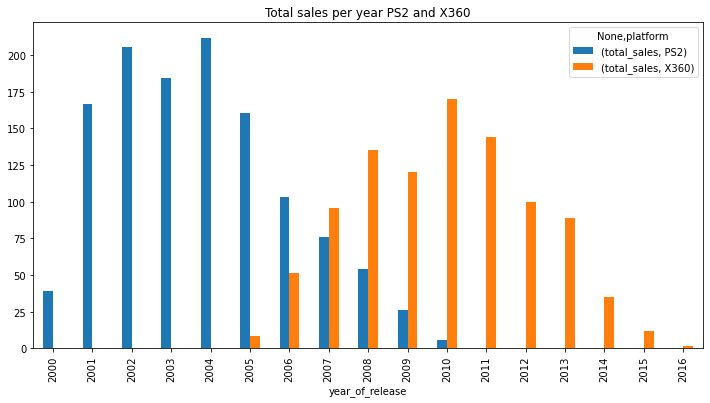

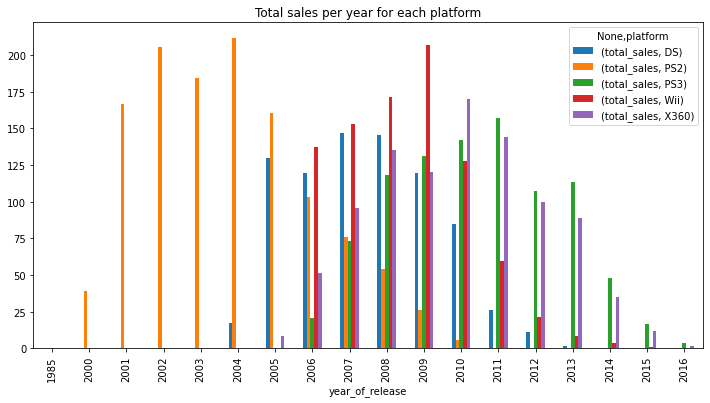

In [33]:
(games
.query('platform=="PS2" | platform=="X360" ')
.pivot_table(index=['platform','year_of_release'], values='total_sales' , aggfunc=('sum'))
.unstack(level=0).plot(kind='bar', subplots=False, figsize=(12,6), title='Total sales per year PS2 and X360')
)

(games
.query('platform=="PS2" | platform=="X360" | platform=="PS3" | platform=="Wii" | platform=="DS" ')
.pivot_table(index=['platform','year_of_release'], values='total_sales' , aggfunc=('sum'))
.unstack(level=0).plot(kind='bar', subplots=False, figsize=(12,6), title='Total sales per year for each platform')
)



<a id='Step_3.3'></a>

<h3>3.3 Determine period for prognosis</h3>

In [12]:
#it seems that it take 10 years for each platform in order to rise and then fade away, so i need to take
#6-5 years before 2017

games_filtered = games.query('year_of_release > 2010 & platform != "X360" & platform != "Wii" & platform != "PS3" & platform != "PSP"')





<a id='Step_3.4'></a>

<h3>3.4 Leading platforms</h3>

          total_sales
platform             
PS4            314.14
3DS            257.81
XOne           159.32
PC              97.68
WiiU            82.19
PSV             53.81
DS              38.73
PS2              0.45


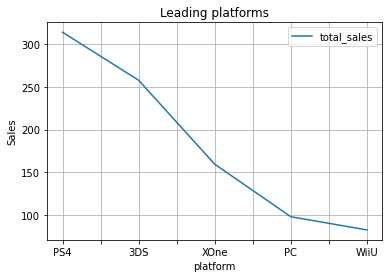

In [13]:
games_filtered_pivot = games_filtered.pivot_table(index='platform', values='total_sales', aggfunc=('sum'))
print(games_filtered_pivot.sort_values(by='total_sales', ascending=False))

games_filtered_pivot.sort_values(by='total_sales',ascending=False).head(5).plot(grid=True, title='Leading platforms').set_ylabel('Sales')
games_filtered_final = games_filtered.query('platform=="PS4" | platform == "3DS" | platform == "XOne" | platform =="PC"')


<a id='Step_3.4.1'></a>

<h3>3.4.1 Leading platforms by year</h3>

<AxesSubplot:title={'center':'Total sales per year for each platform'}, xlabel='year_of_release'>

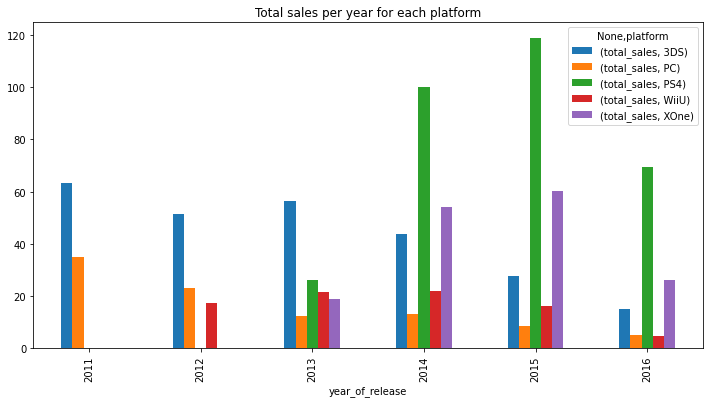

In [14]:
(games_filtered
.query('platform=="PS4" | platform=="3DS" | platform=="XOne" | platform=="PC" | platform=="WiiU" ')
.pivot_table(index=['platform','year_of_release'], values='total_sales' , aggfunc=('sum'))
.unstack(level=0).plot(kind='bar', subplots=False, figsize=(12,6), title='Total sales per year for each platform')
)

<a id='Step_3.4.2'></a>

<h3>3.4.2 Boxplot for leadind platforms</h3>

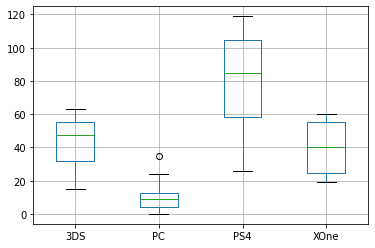

In [15]:
games_boxplot = (games
 .query('platform=="PS4" | platform == "3DS" | platform == "XOne" | platform =="PC"')
 .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=('sum'))
 .boxplot()
)



<a id='Step_3.5'></a>

<h3>3.5 Effect of professional reviews on sales</h3>

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

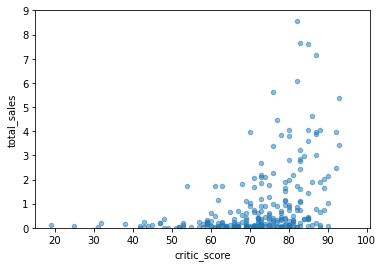

In [16]:
#for PS4 critic_score

(games_filtered
.query('platform == "PS4" & critic_score !=0')
.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, ylim=(0,9))
)


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

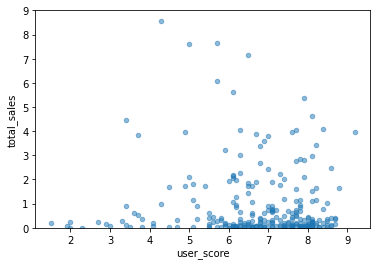

In [17]:
#for PS4 user_score

(games_filtered
.query('platform == "PS4" & user_score !=0 & user_score != "tbd"')
.astype({'user_score': 'float'})
.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, ylim=(0,9))
)

<a id='Step_3.6'></a>

<h3>3.6 Sales of the same games on other platforms </h3>

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

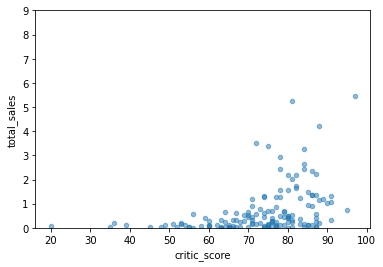

In [18]:
# xone critic_score

games_filtered_ps4 = games_filtered[games_filtered['platform'] == 'PS4']['name']


(games_filtered
.query('platform == "XOne" & critic_score !=0')
.query('name in @games_filtered_ps4')
.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5, ylim=(0,9))
)


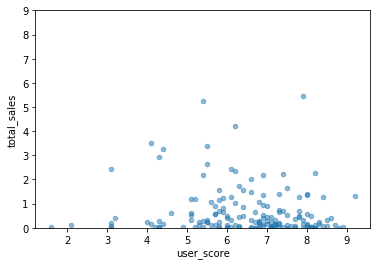

In [21]:
# xone user_score

(games_filtered
.query('platform == "XOne" & user_score !=0 & user_score != "tbd"')
.query('name in @games_filtered_ps4')
.astype({'user_score': 'float'})
.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5, ylim=(0,9))
)


<a id='Step_3.7'></a>

<h3>3.7 Distribution of games by genre

In [19]:
print(games_filtered_final.groupby('genre')['total_sales'].sum().sort_values(ascending=False))

genre
Action          210.79
Shooter         173.03
Role-Playing    146.42
Sports           94.11
Platform         41.47
Simulation       40.98
Racing           38.96
Misc             27.38
Fighting         21.78
Adventure        15.63
Strategy         12.27
Puzzle            6.13
Name: total_sales, dtype: float64


<a id='Step_3.8'></a>

<h3> 3.8 Conclusion

1. Graph Amount of games released per year shows us following:

From 1985 and until 1990 number was really low around 200, and lowest.
From 1990 until 2010 it was increased and highest number of dames was between 2005 and 2010.
Between 2012 and current year, value stays the same, around 600 games per year.

2. Graph Most popular platforms shows us following:

On first place from platforms (based on sales) we have PS2 and on second place X360.
And I decided to take these 5 platforms and check how situation was changed during mentioned period of time.

3. Graph Total sales per year for each platform:

It turned out that approx. it takes about 10 year for platform to rise and fade away.

And Based on this information, I will slice data from 2011 , because I think it needs to be on top during 2017. Also I took following platforms (they were just released): PS4, 3DS, XOne, PC.

4. Graph Leading platforms:

Out of 4 platforms that I choose, leader is PS4 and on second and third place XOne and 3DS.

5. Graph Leading platforms by year:

I took 5 platforms (leaders from previous analyze) and investigated their sales per year.

Since 2014 and until nowadays PS4 takes first place, 3DS is about to fade away. On second place XOne.

    
6. Effect of reviews on sales

I see how professional reviews directly affect sales of games; however I cannot say that about user score. (I used PS4 as an example)
In addition, I did same analyses for different platform - XOne, output more or less looks similar.

In addition I looked at distribution of games based on genre, leaders are Action, Shooter and  Role-Playing.


<a id='Step_4'></a>

<h3> Step 4. User profile for each region

<a id='Step_4.1'></a>

<h3> 4.1 Top five platforms

Text(0, 0.5, 'Sales')

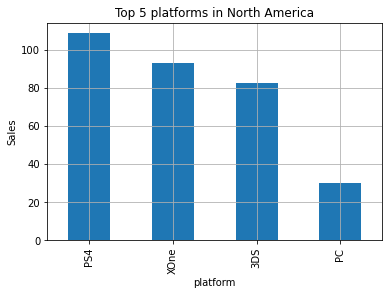

In [20]:
#  North America

(games_filtered_final
 .groupby('platform')['na_sales'].sum()
 .sort_values(ascending=False)
 .plot(kind='bar', grid = True, title='Top 5 platforms in North America' )
 .set_ylabel('Sales')
)




Text(0, 0.5, 'Sales')

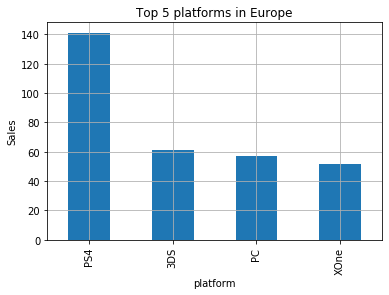

In [24]:
# Europe

(games_filtered_final
 .groupby('platform')['eu_sales'].sum()
 .sort_values(ascending=False)
 .plot(kind='bar', title='Top 5 platforms in Europe', grid = True )
  .set_ylabel('Sales')
)



Text(0, 0.5, 'Sales')

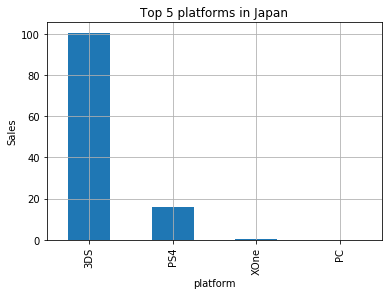

In [25]:
# Japan

(games_filtered_final
 .groupby('platform')['jp_sales'].sum()
 .sort_values(ascending=False)
 .plot(kind='bar', title='Top 5 platforms in Japan', grid = True )
  .set_ylabel('Sales')
)

<a id='Step_4.2'></a>

<h3> 4.2 Top five genres

Top five genres in North America


Top five genres in Europe


Top five genres in Japan

AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Role-Playing'),
  Text(1, 0, 'Action'),
  Text(2, 0, 'Simulation'),
  Text(3, 0, 'Platform'),
  Text(4, 0, 'Misc')])

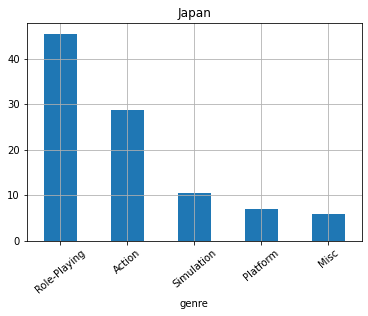

In [50]:
print('Top five genres in North America')
print('')
#print(games_filtered_final.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', title='North America', grid = True))
print('')

print('Top five genres in Europe')
print('')
#print(games_filtered_final.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', title='Europe', grid = True))
print('')
print('Top five genres in Japan')
print('')
print(games_filtered_final.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5).plot(kind='bar', title='Japan', grid = True))
plt.xticks(rotation=40)

<h3>4.4 Affect of ESRB ratings in each region

In [27]:
games_rating = games_filtered_final.query('rating != 0')
print(games_rating.groupby('rating')['na_sales', 'eu_sales', 'jp_sales'].sum())

        na_sales  eu_sales  jp_sales
rating                              
E          63.82     68.88     22.68
E10+       31.71     23.35      5.23
M         106.46    109.03      7.04
RP          0.00      0.03      0.00
T          42.27     40.44      9.99


<a id='Step_4.5'></a>

<h3> 4.5 Conclusion

During step 4 I investigated data for each region:

1. Graph Top five platforms in North America:

PS4, XOne and 3DS almost have equal sales, however PS4 is on first place among them
Last place goes to PC

2. Graph Top five platforms in Europe:

In Europe leading PS4 which has twice more sales compare to second place – 3DS. 
3DS, PC and XOne are almost equal.

3. Graph Top five platforms in Japan:

Surprisingly only single platform 3DS takes over almost all market, on second place PS4 

4. Top five genres:

In North America and Europe leading Action and Shooter, in Japan output is absolutely different and Role-Playing on first place.

5. Investigated how ESRB rating affects our sales. Only Japan is affected.

<a id='Step_5'></a>

<h3>Step 5. Test hypotheses

<a id='Step_5.1'></a>

<h3> 5.1 User's ratings of the Xbox One and PC

In [28]:
#H0 - average user ratings of the Xbox One and PC platforms are the equal.
#Alternative or H1 is that average user ratings of the Xbox One and PC are not equal

rating_xone = games_filtered_final.query('user_score != 0 & platform =="XOne" & user_score != "tbd"')['user_score'].astype('float')
rating_pc = games_filtered_final.query('user_score != 0 & platform =="PC" & user_score != "tbd"')['user_score'].astype('float')


alpha = .05


results = st.ttest_ind(
        rating_xone, 
        rating_pc,
        equal_var = False)
print(results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

0.6130712247638477
We can't reject the null hypothesis


<a id='Step_5.2'></a>

<h3>5.2 User's ratings for the Action and Sport genres 

In [26]:
rating_action = games_filtered_final.query('user_score != 0 & genre =="Action" & user_score != "tbd"')['user_score'].astype('float')
rating_sport = games_filtered_final.query('user_score != 0 & genre =="Sports" & user_score != "tbd"')['user_score'].astype('float')



alpha = .05

results = st.ttest_ind(
        rating_action, 
        rating_sport,
        equal_var = False)

print(results.pvalue)
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

9.426596551488774e-10
We reject the null hypothesis


<a id='Step_5.3'></a>

<h3> 5.3 Conclusion

For both test I used probability threshold - 5%

- First hypotheses:

H0 - average user ratings of the Xbox One and PC platforms are the equal.
Alternative or H1 is that average user ratings of the Xbox One and PC are not equal

Result:

We cannot reject H0, since average of user rating is almost the same for both PC and XOne.


- Second hypotheses 

H0 - average user rating for genres Action and Sports are equal
Alternative or H1 - average user rating for genres Action and Sports are not equal

Result:

We rejected H0, since user rating is differnet for Sports and Action.

<a id='Step_6'></a>

<h3>Step 6. General conclusion

Hello Dear Reviewer.

During this project, I have received information about games, their platforms and sales information. My main goal is to build an action plan for upcoming 2017.

First, we do see that platforms are usually gets their attention after 5-4 years they released, that is the reason I focused on PS4 and Xone (also PC, it has less sales, but more stable on market).

Second, according to my investigation, Action and Shooter are more popular and therefore give more profit.

Based on this information we can conclude that best advice is to count on Action and Shooter released for PS4, Xone or PC (of course Role-Playing if your store located in Japan :))

Thank you.
Andrey.
